In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as py
import random
import pandas as pd
from matplotlib import gridspec


In [2]:
####################################### Set Axes
def set_axes(ax, xlim=None, ylim=None, fontsize=16, twinx=True, twiny=True, minor=True, inout='in'):
        
        if not ylim is None:
            ax.set_ylim(ylim)
        else:
            ylim = ax.get_ylim() 
            
        if not xlim is None:    
            ax.set_xlim(xlim) 
        else:
            xlim = ax.get_xlim()
            
        ax.tick_params(which='major', length=6, width=1., direction=inout)
#         if minor:
        ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)  
        
        if twiny:
            y_ax = ax.twinx()
            y_ax.set_ylim(ylim)
            y_ax.set_yticklabels([])
            y_ax.minorticks_on()
            y_ax.tick_params(which='major', length=6, width=1., direction=inout)
            if minor:
                y_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout) 
        
        if twinx:
            x_ax = ax.twiny()
            x_ax.set_xlim(xlim)
            x_ax.set_xticklabels([])
            x_ax.minorticks_on()
            x_ax.tick_params(which='major', length=6, width=1.0, direction=inout)
            if minor:
                x_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        
        return x_ax, y_ax

In [3]:
# table = np.genfromtxt('DMs_EDD.csv.test' , delimiter='|', 
#                         filling_values=-1, names=True, dtype=None, encoding=None)

df = pd.read_csv("../calibrators/DMs_EDD.csv.test", sep='|')
# revising the column names
for col in df.columns:
    newcol = col.strip()
    df.rename(columns={col:newcol}, inplace=True)

# pgc_edd = table['pgc']
# logWimx   = table['logWimx']
# logWimx_e = table['logWimx_e']
# inc   = table['inc']
# Vmod_edd   = table['Vmod']
# Vls_edd   = table['Vls']

# DM_edd  = table['DMi']
# dDM_edd = table['dDMi']
# DM_edd_raw  = table['DMi_raw']


# iii = table['iii']

df['i***'] = df['iii']
df['I'] = df['iii']-df['DMi']

df['DMbest'] = df['DMi']
df['eDMbest'] = df['dDMi']

df['logD'] = (df['DMbest']-25)/5.
df['logH'] = np.log10(df.Vmod) - df['logD']
df['H0'] = 10**df.logH
df['Vmod'] = df.Vmod

df['Qs'] = df['Sqlt']
df['Qw'] = df['Wqlt']

df['lgWmxi'] = df['logWimx']

df = df[df['i***']>0]

print(df.columns)
df.head()

Index([u'pgc', u'Vh', u'Vls', u'V3k', u'Vmod', u'f_cosmology', u'logWimx',
       u'logWimx_e', u'inc', u'Sqlt', u'Wqlt', u'DM_best', u'dDM_best', u'DMr',
       u'dDMr', u'RMS_r', u'DMr_raw', u'DMi', u'dDMi', u'RMS_i', u'DMi_raw',
       u'DMz', u'dDMz', u'RMS_z', u'DMz_raw', u'DM_w1', u'dDM_w1', u'RMS_w1',
       u'DMw1_raw', u'ggg', u'rrr', u'iii', u'zzz', u'w1', u'w2', u'RA',
       u'DEC', u'gl', u'gb', u'sgl', u'sgb', u'pgc1', u'Nest', u'Vmodg',
       u'Nkt', u'N15', u'sglg', u'sgbg', u'RS', u'P0', u'DM_src', u'i***',
       u'I', u'DMbest', u'eDMbest', u'logD', u'logH', u'H0', u'Qs', u'Qw',
       u'lgWmxi'],
      dtype='object')


/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log10


,pgc,Vh,Vls,V3k,Vmod,f_cosmology,logWimx,logWimx_e,inc,Sqlt,...,i***,I,DMbest,eDMbest,logD,logH,H0,Qs,Qw,lgWmxi
1,4,4458,4706,4109,4154,1.011,2.189,0.014,85,5,...,15.12,-18.17,33.29,0.17,1.658,1.960466,91.299099,5,4,2.189
3,16,5667,5809,5312,5387,1.014,2.515,0.025,65,5,...,13.58,-21.12,34.70,0.24,1.940,1.791347,61.851036,5,5,2.515
4,55,4779,5052,4454,4507,1.012,2.260,0.025,80,5,...,15.22,-18.78,34.00,0.24,1.800,1.853888,71.431136,5,4,2.260
5,68,7664,7740,7338,7480,1.019,2.390,0.043,57,5,...,14.52,-20.30,34.82,0.37,1.964,1.909902,81.264637,5,5,2.390
6,70,6800,7040,6447,6557,1.017,2.636,0.005,90,5,...,13.24,-21.88,35.12,0.12,2.024,1.792705,62.044771,5,5,2.636


In [41]:
df = pd.read_csv("CF4_TF_distances.csv", sep='|')

x = df['i***']-df.DMbest
np.max(x[df['i***']>0])
df['I'] = x

df['logD'] = (df['DMbest']-25)/5.
df['logH'] = np.log10(df.f*df.Vcmb) - df['logD']
df['H0'] = 10**df.logH
df['Vmod'] = df.f*df.Vcmb

print(df.columns)
df.head()

Index([u'pgc', u'DMbest', u'eDMbest', u'PGC1', u'Nest', u'Vh', u'Vls', u'Vcmb',
       u'f', u'DMr', u'eDMr', u'DMr_rms', u'DMr_raw', u'DMi', u'eDMi',
       u'DMi_rms', u'DMi_raw', u'DMz', u'eDMz', u'DMz_rms', u'DMz_raw',
       u'DM_w1', u'eDM_w1', u'DM_w1_rms', u'DM_w1_raw', u'lgWmxi', u'elgWi',
       u'inc', u'Qs', u'Qw', u'g***', u'r***', u'i***', u'z***', u'w1***',
       u'w2***', u'R_so', u'P1_W2', u'DM_so', u'RA', u'DE', u'GLong', u'GLat',
       u'SGL', u'SGB', u'Nkt', u'N15', u'SGLg', u'SGBg', u'Vmodg', u'I',
       u'logD', u'logH', u'H0', u'Vmod'],
      dtype='object')


/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  


,pgc,DMbest,eDMbest,PGC1,Nest,Vh,Vls,Vcmb,f,DMr,...,Nkt,N15,SGLg,SGBg,Vmodg,I,logD,logH,H0,Vmod
0,2,34.24,0.29,73150,200275,5004,5296,4726,1.013,0.00,...,0,7,341.4922,20.7395,4976,-34.24,1.848,1.832103,67.936499,4787.438
1,4,33.29,0.17,120,202766,4458,4706,4109,1.011,33.31,...,0,0,316.0587,18.4514,4154,-18.17,1.658,1.960487,91.303473,4154.199
2,12,35.03,0.22,12,210177,6548,6685,6195,1.016,0.00,...,0,1,286.4249,11.3510,6279,-35.03,2.006,1.792935,62.077614,6294.120
3,16,34.70,0.24,16,211419,5667,5809,5312,1.014,34.70,...,0,1,287.6120,11.7030,5434,-21.12,1.940,1.791296,61.843779,5386.368
4,55,34.00,0.24,55,0,4779,5052,4454,1.012,34.00,...,0,0,327.0996,19.7763,4507,-18.78,1.800,1.853931,71.438237,4507.448


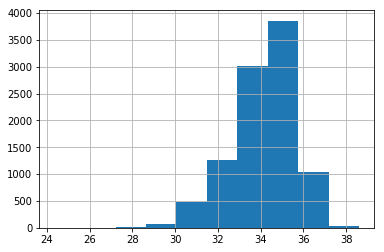

In [42]:
df.DMbest.hist()

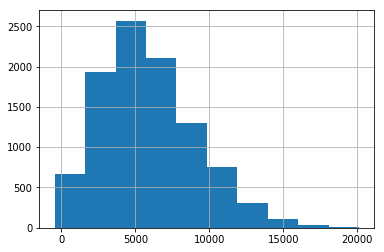

In [43]:
df.Vmod.hist()

In [44]:
from scipy.optimize import curve_fit


def myHubble(D, H0):
    return H0    

def PlotMe(ax, df, low, high, color='r', delta=0, label=None, param='DMbest', quality='Qs', mag='i'):
    
    
    # & (df.I<-17-(df.DMbest-31)
    dff = df[(df[param]>low) & (df[param]<high) & (df.Vmod > 0) & (df[quality]>2)]
    dff.plot.scatter(
                     x=mag+'***', y='H0', alpha=0.1, ax=ax, color='k', s=2
                     )

    X = dff[mag+'***'].values
    Y = dff['H0'].values+delta
    xmin = np.min(X)
    xmax = np.max(X)
    lab = True
    for i in np.arange(xmin, xmax, 1):
        xp = []
        yp = []
        for ii in range(len(X)):
            xi = X[ii]
            if xi>=i and xi<i+1 and not np.isnan(Y[ii]):
                xp.append(xi)
                yp.append(Y[ii])
        if len(xp)>0:
            if lab:
                labe = label
                lab = False
            else:
                labe=None
                
            xp = np.asarray(xp)
            yp = np.asarray(yp)
            ax.errorbar(np.mean(xp), 10**np.median(np.log10(yp)), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                        color=color, ms=6, label=labe)     
#             print np.median(xp), 10**np.median(yp)

    x_ax, y_ax = set_axes(ax, (5,18), (35,150), fontsize=14) 
    ax.set_yscale('log')
    
    from matplotlib.ticker import MultipleLocator

    from matplotlib.ticker import NullFormatter
    
    ax.set_yticks(np.arange(30,150, step=30))
    ax.yaxis.set_major_formatter(NullFormatter())  
    ax.yaxis.set_minor_formatter(NullFormatter())

    ax.yaxis.set_major_locator(MultipleLocator(30))
    ax.yaxis.set_minor_locator(MultipleLocator(10))

    plt.yticks([40, 70, 100, 130], ('40', '70', '100','130'))
    # ax.set_yticks(np.arange(50,140, step=10))



    y_ax.set_yticks(np.arange(30,150, step=30))
    y_ax.set_yscale('log')
    y_ax.yaxis.set_major_formatter(NullFormatter())  
    y_ax.yaxis.set_minor_formatter(NullFormatter())
    y_ax.yaxis.set_major_locator(MultipleLocator(30))
    y_ax.yaxis.set_minor_locator(MultipleLocator(10))    
    
    ax.set_ylabel(r'$H_{best}$', fontsize=18)
    ax.legend(loc=3)
    
    
    fit, cov = curve_fit(myHubble, X, dff.logH)
    m = fit[0]
    H0 = 10**m
    ax.plot([5,20], [H0, H0], '--', color='blue')

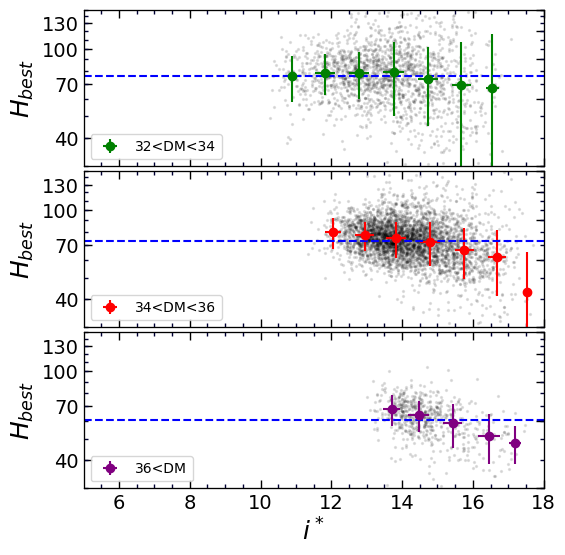

In [45]:
fig = py.figure(figsize=(5, 8), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(4,1) ; p=0

# ax = plt.subplot(gs[p]) ; p+=1
# PlotMe(ax, df, 31, 33, color='b', delta=0, label='DM<32')
mag='i'


ax = plt.subplot(gs[p]) ; p+=1
PlotMe(ax, df, 32, 34, color='green', delta=0, label='32<DM<34', mag=mag)

ax = plt.subplot(gs[p]) ; p+=1
PlotMe(ax, df, 34, 36, color='r', label='34<DM<36', mag=mag)

ax = plt.subplot(gs[p]) ; p+=1
PlotMe(ax, df, 36, 40, color='purple', delta=0, label='36<DM', mag=mag)

ax.set_xlabel(r'$i^*$', fontsize=18)

plt.subplots_adjust(hspace=0.03, wspace=0.2)

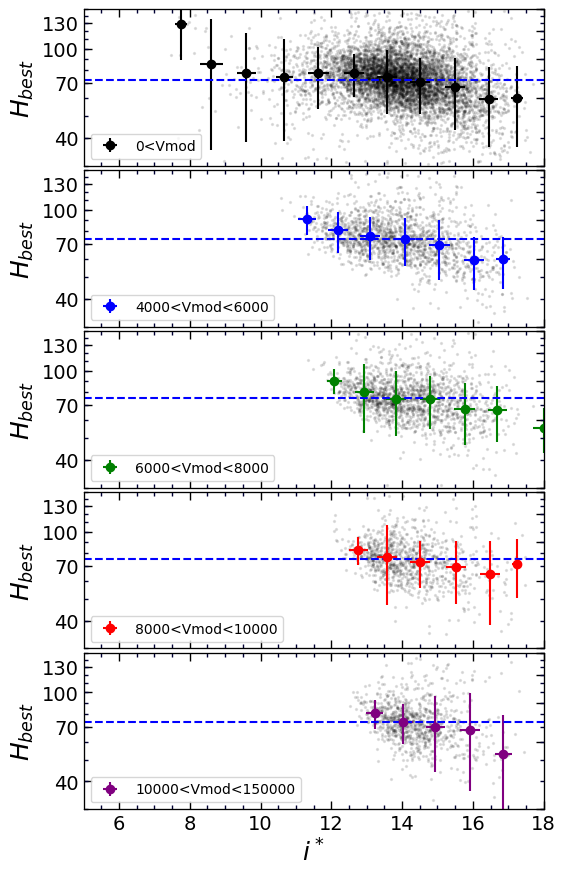

In [46]:
fig = py.figure(figsize=(5, 10), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(5,1) ; p=0

mag='i'


ax = plt.subplot(gs[p]) ; p+=1
PlotMe(ax, df, 0, 20000, color='k', delta=0, label='0<Vmod', param='Vmod', mag=mag)

ax = plt.subplot(gs[p]) ; p+=1
PlotMe(ax, df, 4000, 6000, color='b', delta=0, label='4000<Vmod<6000', param='Vmod', mag=mag)

ax = plt.subplot(gs[p]) ; p+=1
PlotMe(ax, df, 6000, 8000, color='g', delta=0, label='6000<Vmod<8000', param='Vmod', mag=mag)

ax = plt.subplot(gs[p]) ; p+=1
PlotMe(ax, df, 8000, 10000, color='r', delta=0, label='8000<Vmod<10000', param='Vmod', mag=mag)

ax = plt.subplot(gs[p]) ; p+=1
PlotMe(ax, df, 10000, 15000, color='purple', delta=0, label='10000<Vmod<150000', param='Vmod', mag=mag)

ax.set_xlabel(r'$i^*$', fontsize=18)

plt.subplots_adjust(hspace=0.03, wspace=0.2)

Text(0,0.5,'DM [mag]')

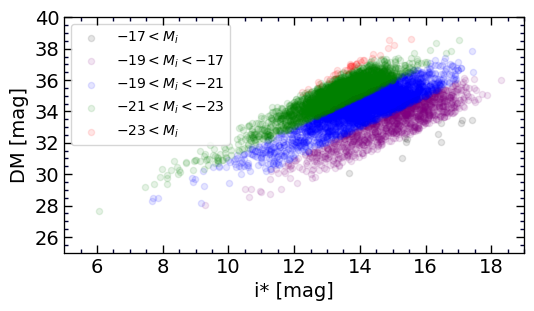

In [47]:
fig = py.figure(figsize=(5, 10), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(3,1) ; p=0

ax = plt.subplot(gs[p]) ; p+=1
X = 'i***'
Y = 'DMbest'
df[df.I>-17].plot.scatter(x=X, y=Y, color='k', alpha=0.1, ax=ax, label=r'$-17<M_i$')
df[((df.I<-17) & (df.I>-19))].plot.scatter(x=X, y=Y, color='purple', alpha=0.1, ax=ax, label=r'$-19<M_i<-17$')
df[((df.I<-19) & (df.I>-21))].plot.scatter(x=X, y=Y, color='b', alpha=0.1, ax=ax, label=r'$-19<M_i<-21$')
df[((df.I<-21) & (df.I>-23))].plot.scatter(x=X, y=Y, color='green', alpha=0.1, ax=ax, label=r'$-21<M_i<-23$')
df[((df.I<-23) & (df.I>-25))].plot.scatter(x=X, y=Y, color='red', alpha=0.1, ax=ax, label=r'$-23<M_i$')

x_ax, y_ax = set_axes(ax, (5,19), (25,40), fontsize=14) 
ax.set_xlabel("i* [mag]", fontsize=14)
ax.set_ylabel("DM [mag]", fontsize=14)

# ax = plt.subplot(gs[p]) ; p+=1
# X = 'i***'
# Y = 'logH'
# df[df.I>-17].plot.scatter(x=X, y=Y, color='k', alpha=0.1, ax=ax)
# df[((df.I<-17) & (df.I>-19))].plot.scatter(x=X, y=Y, color='purple', alpha=0.1, ax=ax)
# df[((df.I<-19) & (df.I>-21))].plot.scatter(x=X, y=Y, color='b', alpha=0.1, ax=ax)
# df[((df.I<-21) & (df.I>-23))].plot.scatter(x=X, y=Y, color='green', alpha=0.1, ax=ax)
# df[((df.I<-23) & (df.I>-25))].plot.scatter(x=X, y=Y, color='red', alpha=0.1, ax=ax)



# ax = plt.subplot(gs[p]) ; p+=1
# X = 'i***'
# Y = 'lgWmxi'
# df[df.I>-17].plot.scatter(x=X, y=Y, color='k', alpha=0.1, ax=ax)
# df[((df.I<-17) & (df.I>-19))].plot.scatter(x=X, y=Y, color='purple', alpha=0.1, ax=ax)
# df[((df.I<-19) & (df.I>-21))].plot.scatter(x=X, y=Y, color='b', alpha=0.1, ax=ax)
# df[((df.I<-21) & (df.I>-23))].plot.scatter(x=X, y=Y, color='green', alpha=0.1, ax=ax)
# df[((df.I<-23) & (df.I>-25))].plot.scatter(x=X, y=Y, color='red', alpha=0.1, ax=ax)

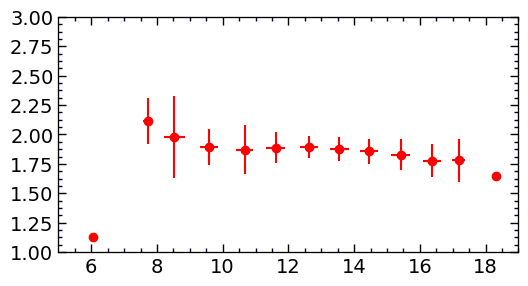

In [48]:
fig = py.figure(figsize=(5, 10), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(3,1) ; p=0

ax = plt.subplot(gs[p]) ; p+=1
X = 'i***'
Y = 'logH'
# df[df.lgWmxi>2.8].plot.scatter(x=X, y=Y, color='r', alpha=0.1, ax=ax)
# df[((df.lgWmxi<2.8) & (df.lgWmxi>2.6))].plot.scatter(x=X, y=Y, color='purple', alpha=0.1, ax=ax)
# df[((df.lgWmxi<2.6) & (df.lgWmxi>2.4))].plot.scatter(x=X, y=Y, color='green', alpha=0.1, ax=ax)
# df[((df.lgWmxi<2.4) & (df.lgWmxi>2.2))].plot.scatter(x=X, y=Y, color='blue', alpha=0.1, ax=ax)
# df[((df.lgWmxi<2.2) & (df.lgWmxi>0))].plot.scatter(x=X, y=Y, color='k', alpha=0.1, ax=ax)

x_ax, y_ax = set_axes(ax, (5,19), (1,3), fontsize=14) 



X = df[X].values
Y = df[Y].values
xmin = np.min(X)
xmax = np.max(X)
for i in np.arange(xmin, xmax, 1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1 and not np.isnan(Y[ii]):
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='red', ms=6) 
#         print(np.mean(xp), np.mean(yp))

In [49]:
df.columns

Index([u'pgc', u'DMbest', u'eDMbest', u'PGC1', u'Nest', u'Vh', u'Vls', u'Vcmb',
       u'f', u'DMr', u'eDMr', u'DMr_rms', u'DMr_raw', u'DMi', u'eDMi',
       u'DMi_rms', u'DMi_raw', u'DMz', u'eDMz', u'DMz_rms', u'DMz_raw',
       u'DM_w1', u'eDM_w1', u'DM_w1_rms', u'DM_w1_raw', u'lgWmxi', u'elgWi',
       u'inc', u'Qs', u'Qw', u'g***', u'r***', u'i***', u'z***', u'w1***',
       u'w2***', u'R_so', u'P1_W2', u'DM_so', u'RA', u'DE', u'GLong', u'GLat',
       u'SGL', u'SGB', u'Nkt', u'N15', u'SGLg', u'SGBg', u'Vmodg', u'I',
       u'logD', u'logH', u'H0', u'Vmod'],
      dtype='object')

/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in log10


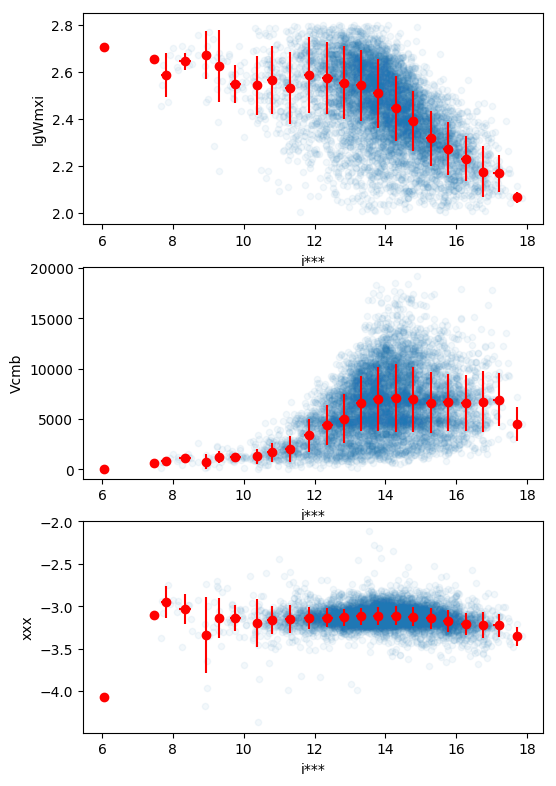

In [50]:
fig = py.figure(figsize=(5, 9), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(3,1) ; p=0

ax = plt.subplot(gs[p]) ; p+=1

dff = df[(df.lgWmxi>2) & (df.lgWmxi<2.8) & (df["i***"]>2)  & (df["i***"]<18)]
dff.plot.scatter(y='lgWmxi', x='i***', alpha=0.05, ax=ax)


X = dff['i***'].values
Y = dff['lgWmxi'].values
xmin = np.min(X)
xmax = np.max(X)
lab = True
for i in np.arange(xmin, xmax, 0.5):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.5:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
    

    


ax = plt.subplot(gs[p]) ; p+=1

dff = df[(df.lgWmxi>2) & (df.lgWmxi<2.8) & (df["i***"]>2)  & (df["i***"]<18)]
dff.plot.scatter(y='Vcmb', x='i***', alpha=0.05, ax=ax)


X = dff['i***'].values
Y = dff['Vcmb'].values
xmin = np.min(X)
xmax = np.max(X)
lab = True
for i in np.arange(xmin, xmax, 0.5):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.5:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
        
        
        
ax = plt.subplot(gs[p]) ; p+=1


slope = -8.34
zp = -20.80-0.04

df['xxx'] = np.log10(df.Vcmb) - 0.2*df["i***"]+0.2*df.lgWmxi*slope
dff = df[(df.lgWmxi>2) & (df.lgWmxi<2.8) & (df["i***"]>2)  & (df["i***"]<18)]
dff.plot.scatter(y='xxx', x='i***', alpha=0.05, ax=ax)


X = dff['i***'].values
Y = dff['xxx'].values
xmin = np.min(X)
xmax = np.max(X)
lab = True
for i in np.arange(xmin, xmax, 0.5):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.5:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6) 

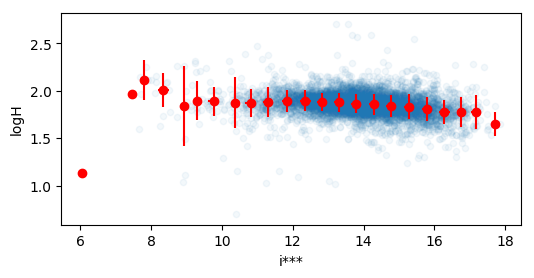

In [51]:
fig = py.figure(figsize=(5, 9), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(3,1) ; p=0

ax = plt.subplot(gs[p]) ; p+=1

dff = df[(df.Vcmb>0) & (df.Vcmb<10000)  & (df["i***"]>2)  & 
         (df["i***"]<18) & (df.I<-16)]
dff.plot.scatter(y='logH', x='i***', alpha=0.05, ax=ax)


X = dff['i***'].values
Y = dff['logH'].values
xmin = np.min(X)
xmax = np.max(X)
lab = True
for i in np.arange(xmin, xmax, 0.5):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.5:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   

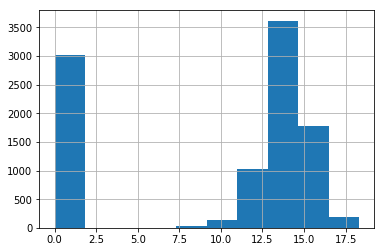

In [52]:
df['i***'].hist()